<a href="https://colab.research.google.com/github/andrewpkitchin/notes/blob/main/carry_over_and_shape_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymc_marketing

  Using cached pymc_marketing-0.8.0-py3-none-any.whl.metadata (26 kB)
  Using cached pymc-5.15.1-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.5/146.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.6/484.6 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.18.6
    Uninstalling pytensor-2.18.6:
      Successfully uninstalled pytensor-2.18.6
  Attempting uninstall: pymc
    Found existing installation: pymc 5.10.4
    Uninstalling pymc-5.10.4:
      Successfully uninstalled pymc-5.10.4


In [ ]:
# carry-over (adstock)

def weight_function(lag, alpha):
  return alpha ** lag

def transformer(window, alpha, total_lag):
  numerator = 0
  denominator = 0

  for day_number in range(total_lag):
    numerator += weight_function(day_number,alpha)* float(window[day_number])
    denominator += weight_function(day_number,alpha)

  return numerator / denominator

def adstock(list_of_spending, alpha, total_lag):
  transformed_spending = []

  for i in range(total_lag,len(list_of_spending)):
    transformed_spending.append(transformer(list_of_spending[i-total_lag:i], alpha, total_lag))

  return transformed_spending

In [ ]:
# carry-over (adstock)

def transformer2(window, alpha, beta):

  transformed = float(window[0])**alpha + float(window[1])*beta

  return transformed

def adstock2(list_of_spending, alpha, beta):
  transformed_spending = []

  for i in range(2,len(list_of_spending)):
    transformed_spending.append(transformer2(list_of_spending[i-2:i], alpha, beta))

  return transformed_spending

In [ ]:
# example

channel_spend = ['279', '291', '427', '427', '430', '1064', '988', '1016', '801', '797', '753', '509', '512', '370', '288', '199', '189', '107', '102', '104', '105', '111', '259', '263', '261', '273', '265', '261', '289', '1040', '1044', '1041', '1105', '1033', '1106', '812', '908', '159', '43', '57', '554', '603', '730', '925', '501', '297', '90', '36']

# Convert the channel_spend to integers
channel_spend = [int(spend) for spend in channel_spend]

In [ ]:
# create a list of the adstock transformed channel_spend with a spending_window of length 3

transformed_spending = adstock(channel_spend, 0.5, 2)

transformed_spending2 = adstock2(channel_spend, 0.8, 0.8)

print(transformed_spending)
print(transformed_spending2)

[283.0, 336.3333333333333, 427.0, 428.0, 641.3333333333334, 1038.6666666666667, 997.3333333333334, 944.3333333333334, 799.6666666666666, 782.3333333333334, 671.6666666666666, 510.0, 464.6666666666667, 342.6666666666667, 258.3333333333333, 195.66666666666666, 161.66666666666666, 105.33333333333333, 102.66666666666667, 104.33333333333333, 107.0, 160.33333333333334, 260.3333333333333, 262.3333333333333, 265.0, 270.3333333333333, 263.6666666666667, 270.3333333333333, 539.3333333333334, 1041.3333333333333, 1043.0, 1062.3333333333333, 1081.0, 1057.3333333333333, 1008.0, 844.0, 658.3333333333334, 120.33333333333333, 47.666666666666664, 222.66666666666666, 570.3333333333334, 645.3333333333334, 795.0, 783.6666666666666, 433.0, 228.0]
[323.26557806288685, 435.16520881929637, 468.7575934613168, 471.15759346131676, 979.0717958351313, 1054.369228046124, 1061.5743245014305, 895.1987460768811, 847.9323203244993, 811.8916209364278, 607.3870505536504, 555.9437656377969, 443.0333894396205, 343.786507701

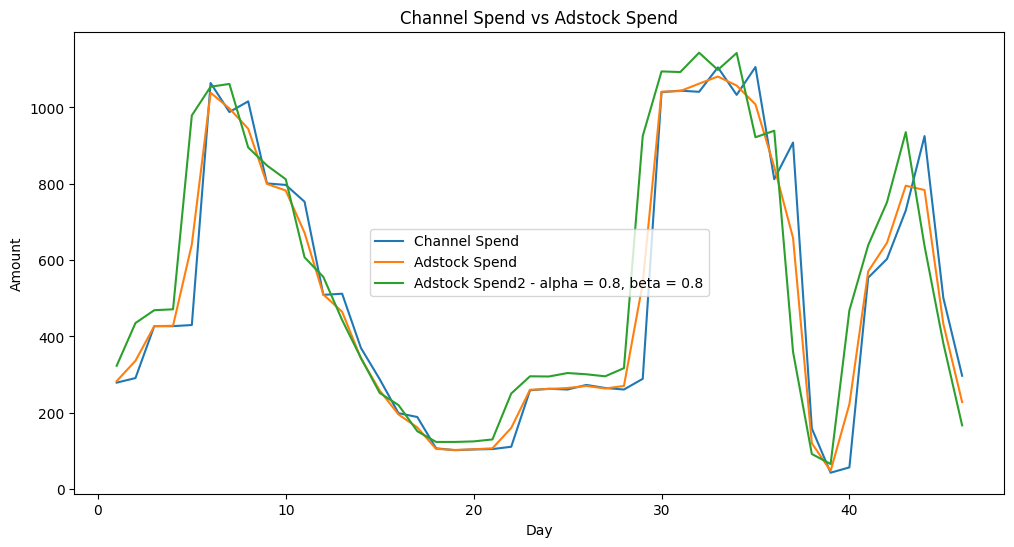

In [ ]:
import matplotlib.pyplot as plt

# Truncate the longer list to match the length of the shorter one
channel_spend_truncated = channel_spend[:len(transformed_spending)]

# Generating a list of days for the x-axis again with the truncated data
days = list(range(1, len(transformed_spending) + 1))

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(days, channel_spend_truncated, label='Channel Spend')
plt.plot(days, transformed_spending, label='Adstock Spend')
plt.plot(days, transformed_spending2, label='Adstock Spend2 - alpha = 0.8, beta = 0.8')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.title('Channel Spend vs Adstock Spend')
plt.legend()
plt.show()


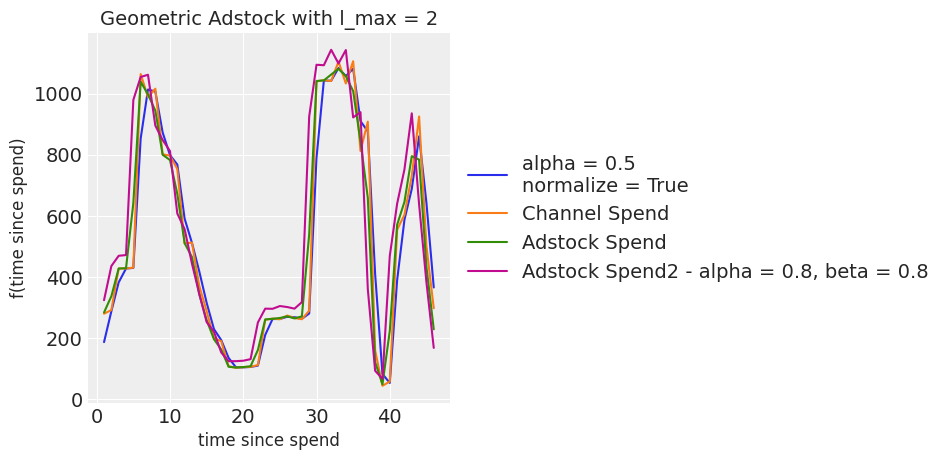

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import arviz as az
from pymc_marketing.mmm.transformers import geometric_adstock
plt.style.use('arviz-darkgrid')
l_max = 2
params = [
    (0.5, True),

]

days = list(range(1, len(transformed_spending) + 1))

channel_spend_array = np.array(channel_spend)

ax = plt.subplot(111)
for a, normalize in params:
    y = geometric_adstock(channel_spend_array, alpha=a, l_max=l_max, normalize=normalize).eval()
    plt.plot(days, y[:len(transformed_spending)], label=f'alpha = {a}\nnormalize = {normalize}')
plt.plot(days, channel_spend_truncated, label='Channel Spend')
plt.plot(days, transformed_spending, label='Adstock Spend')
plt.plot(days, transformed_spending2, label='Adstock Spend2 - alpha = 0.8, beta = 0.8')
plt.xlabel('time since spend', fontsize=12)
plt.title(f'Geometric Adstock with l_max = {l_max}', fontsize=14)
plt.ylabel('f(time since spend)', fontsize=12)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.65, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


